<a href="https://colab.research.google.com/github/abdipourasl/Alzheimer/blob/main/AD_PLV_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Check if TPU is available
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Automatically detects the TPU
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("TPU is ready")
except ValueError:
    print("TPU not available, running on CPU/GPU.")

strategy = tf.distribute.TPUStrategy(resolver)

TPU is ready


# 80% for Train, 20% for Test

## PLV Images

### Load PLV Images

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import gdown
# file_id = '1jWL4uB1PWY_k6HcvngN-b66nkUL7hz9H' #Delta_Pre_EC
file_id = '1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_' #Full_Pre_EC

destination = 'PLV Images.rar'  # Replace with your desired file name and extension
gdown.download(id=file_id, output=destination, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_
From (redirected): https://drive.google.com/uc?id=1nE92WetD0IsKuEoQLU4RaQ7pdvClhFC_&confirm=t&uuid=3c39e322-b711-43da-8201-88122cedc4b1
To: /content/PLV Images.rar
100%|██████████| 908M/908M [00:04<00:00, 195MB/s]


'PLV Images.rar'

In [ ]:
!unrar x 'PLV Images.rar'

Streaming output truncated to the last 5000 lines.
Extracting  full/subject_083_trial_10_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_11_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_12_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_13_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_14_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_15_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_16_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_17_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_18_full.jpg                            53%  OK 
Extracting  full/subject_083_trial_19_full.jpg                            53%  OK 
Extracting  full/subject_083_

### Load Demographic & Tests

In [ ]:
import gdown

file_id = '1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2
To: /content/tests.xlsx
100%|██████████| 18.3k/18.3k [00:00<00:00, 24.0MB/s]


'tests.xlsx'

### Seperate data


In [ ]:
import os
import shutil
from pathlib import Path
from PIL import Image  # Pillow library for image processing

# Path to the original images
original_images_path = Path('/content/full')

# Path to save the organized and cropped images
organized_cropped_path = Path('/content/Organized_Images')

# Create the destination directory if it doesn't exist
organized_cropped_path.mkdir(parents=True, exist_ok=True)

#### Crop

In [ ]:
# Calculate the crop box coordinates
left = 140
upper = 50
right = 875 - 205  # 660
lower = 656 - 78   # 578

crop_box = (left, upper, right, lower)  # (140, 50, 660, 578)

print(f"Crop Box Coordinates: {crop_box}")


Crop Box Coordinates: (140, 50, 670, 578)


#### Organize data

In [ ]:
# Iterate through all files in the original_images_path
for image_path in original_images_path.iterdir():
    # Check if the current path is a file and has a valid image extension
    if image_path.is_file() and image_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
        # Example filename format: subject_001_trial_1.jpg
        # Split the filename to extract parts
        parts = image_path.stem.split('_')  # 'stem' gives the filename without extension

        # Ensure the filename has at least 3 parts and starts with 'subject'
        if len(parts) >= 3 and parts[0].lower() == 'subject':
            subject_number = parts[1]  # '001'

            # Define the subject folder name
            subject_folder_name = f'subject_{subject_number}'

            # Define the full path to the subject folder
            subject_folder = organized_cropped_path / subject_folder_name

            # Create the subject folder if it doesn't exist
            subject_folder.mkdir(exist_ok=True)

            # Define the destination path for the cropped image
            destination = subject_folder / image_path.name

            try:
                # Open the image using PIL
                with Image.open(image_path) as img:
                    # Crop the image
                    cropped_img = img.crop(crop_box)

                    # Save the cropped image to the destination folder
                    cropped_img.save(destination)

                print(f'Cropped and moved {image_path.name} to {subject_folder_name}')
            except Exception as e:
                print(f'Error processing {image_path.name}: {e}')
        else:
            print(f'Skipping file with unexpected format: {image_path.name}')


Streaming output truncated to the last 5000 lines.
Cropped and moved subject_061_trial_58_full.jpg to subject_061
Cropped and moved subject_009_trial_68_full.jpg to subject_009
Cropped and moved subject_112_trial_62_full.jpg to subject_112
Cropped and moved subject_001_trial_54_full.jpg to subject_001
Cropped and moved subject_076_trial_75_full.jpg to subject_076
Cropped and moved subject_098_trial_55_full.jpg to subject_098
Cropped and moved subject_026_trial_30_full.jpg to subject_026
Cropped and moved subject_101_trial_73_full.jpg to subject_101
Cropped and moved subject_015_trial_26_full.jpg to subject_015
Cropped and moved subject_021_trial_10_full.jpg to subject_021
Cropped and moved subject_067_trial_46_full.jpg to subject_067
Cropped and moved subject_022_trial_15_full.jpg to subject_022
Cropped and moved subject_085_trial_5_full.jpg to subject_085
Cropped and moved subject_127_trial_18_full.jpg to subject_127
Cropped and moved subject_124_trial_76_full.jpg to subject_124
Cropp

### Load Labels


In [ ]:
# Install required libraries
!pip install --upgrade pandas openpyxl

# Import necessary libraries
import pandas as pd
import os
import shutil
from pathlib import Path


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# Define the path to the Excel file
excel_path = Path('/content/tests.xlsx')  # Adjust if the file is in a different location

# Read the Excel file
# Assuming that the data starts from the first row and relevant columns are A (Subject ID), B (Diagnosi), and E (MMSE)
df = pd.read_excel(excel_path, usecols=['ID pz', 'Diagnosi', 'MMSE'])

# Display the first few rows to verify
print("Excel Data Preview:")
print(df.head())


Excel Data Preview:
   ID pz Diagnosi   MMSE
0      4       AD  16.46
1      7       AD  23.27
2     16       AD  13.86
3     19       AD  19.86
4     20       AD  22.85


In [ ]:
# df = pd.read_excel(excel_path, header=None, usecols=[0,1,4], names=['Subject_ID', 'Diagnosi', 'MMSE'])


In [ ]:
# Ensure that Subject_ID is treated as string and zero-padded to match folder names
df['Subject_ID'] = df['ID pz'].astype(str).str.zfill(3)  # Converts 1 to '001', 4 to '004', etc.

# Create a dictionary mapping Subject_ID to Diagnosi
subject_to_diagnosis = pd.Series(df.Diagnosi.values, index=df.Subject_ID).to_dict()

# (Optional) Create a dictionary mapping Subject_ID to MMSE scores
subject_to_mmse = pd.Series(df.MMSE.values, index=df.Subject_ID).to_dict()

# Display the mapping
print("\nSubject to Diagnosis Mapping:")
print(subject_to_diagnosis)



Subject to Diagnosis Mapping:
{'004': 'AD', '007': 'AD', '016': 'AD', '019': 'AD', '020': 'AD', '021': 'AD', '027': 'AD', '028': 'AD', '031': 'AD', '035': 'AD', '037': 'AD', '040': 'AD', '044': 'AD', '046': 'AD', '053': 'AD', '055': 'AD', '058': 'AD', '059': 'AD', '061': 'AD', '065': 'AD', '069': 'AD', '076': 'AD', '078': 'AD', '082': 'AD', '083': 'AD', '085': 'AD', '088': 'AD', '089': 'AD', '091': 'AD', '092': 'AD', '096': 'AD', '103': 'AD', '107': 'AD', '109': 'AD', '114': 'AD', '115': 'AD', '129': 'AD', '131': 'AD', '132': 'AD', '133': 'AD', '135': 'AD', '136': 'AD', '137': 'AD', '138': 'AD', '139': 'AD', '142': 'AD', '143': 'AD', '145': 'AD', '146': 'AD', '149': 'AD', '001': 'MCI', '002': 'MCI', '003': 'MCI', '008': 'MCI', '014': 'MCI', '023': 'MCI', '024': 'MCI', '025': 'MCI', '026': 'MCI', '029': 'MCI', '033': 'MCI', '034': 'MCI', '039': 'MCI', '042': 'MCI', '045': 'MCI', '048': 'MCI', '049': 'MCI', '052': 'MCI', '054': 'MCI', '056': 'MCI', '063': 'MCI', '064': 'MCI', '067': 'MC

In [ ]:
# # Define paths
# organized_images_path = Path('/content/Organized_Images')  # Path where subject folders are located
# labeled_images_path = Path('/content/Labeled Images')      # Path where labeled folders will be created

# # Create parent directories for each diagnostic group
# diagnostic_groups = ['AD', 'MCI', 'CNTRL']
# for group in diagnostic_groups:
#     (labeled_images_path / group).mkdir(parents=True, exist_ok=True)
#     print(f"Created folder: {group}")

# # Iterate through each subject folder and move it to the corresponding diagnostic group folder
# for subject_folder in organized_images_path.iterdir():
#     if subject_folder.is_dir() and subject_folder.name.startswith('subject_'):
#         # Extract the subject number from the folder name
#         subject_number = subject_folder.name.split('_')[1]  # '001' from 'subject_001'

#         # Lookup the diagnosis
#         diagnosis = subject_to_diagnosis.get(subject_number)

#         if diagnosis in diagnostic_groups:
#             # Define the destination path
#             destination = labeled_images_path / diagnosis / subject_folder.name

#             # Move the folder
#             shutil.move(str(subject_folder), str(destination))
#             print(f"Moved {subject_folder.name} to {diagnosis} folder.")
#         else:
#             print(f"Diagnosis for {subject_folder.name} not found or invalid. Skipping.")


In [ ]:
# import os
# import re
# import numpy as np

# data_dir = 'PLV(Subject Wise)'


# def extract_numeric_part(folder_name):
#     parts = folder_name.split('_')
#     for part in parts:
#         if part.startswith('Subject'):
#             return int(part.replace('Subject', ''))
#     return -1  # Return -1 if no numeric part is found

# folders = sorted([f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))], key=extract_numeric_part)

# subject_folders, labels = [], []

# for folder_name in folders:
#     subject_num = extract_numeric_part(folder_name)
#     subject_folder = os.path.join(data_dir, folder_name)
#     subject_folders.append(subject_folder)

# labels = []
# for subject_num in range(1, 81):  # Assuming subject numbers 1 to 80
#     if 1 <= subject_num <= 20 or 41 <= subject_num <= 60:
#         labels.append(0)  # AD group
#     elif 21 <= subject_num <= 40 or 61 <= subject_num <= 80:
#         labels.append(1)  # HC group



# subject_folders = np.array(subject_folders)
# subject_folders = list(subject_folders)

# labels = list(labels)
# print("Labels:", labels)

## Data Loading and Assigning

### Load Libraries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
import gdown
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, LearningRateScheduler
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, EfficientNetB2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shutil


In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


### Read Excel

In [ ]:
# Download the Excel file using gdown
file_id = '1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2'
destination = 'tests.xlsx'
gdown.download(id=file_id, output=destination, quiet=False)
excel_path = Path('tests.xlsx')  # Adjust the path if necessary

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_path)

# Inspect the DataFrame
print("DataFrame Head:")
print(df.head())

# Create a mapping from subject ID to MMSE score
# Assuming 'ID pz' is the subject ID and 'MMSE' is the score
id_to_mmse = pd.Series(df.MMSE.values, index=df['ID pz']).to_dict()

print("Subject ID to MMSE Mapping:")
print(id_to_mmse)


Downloading...
From: https://drive.google.com/uc?id=1vU_zHcaCMxvP5aTIl5YMyqD3aAzk8YM2
To: /content/tests.xlsx
100%|██████████| 18.3k/18.3k [00:00<00:00, 25.3MB/s]

DataFrame Head:
   ID pz Diagnosi  Age Sesso   MMSE  STAI_Y1  STAI_Y2  PSQI   ESS   HAM
0      4       AD   69     M  16.46     28.0     31.0   3.0   4.0   5.0
1      7       AD   63     F  23.27     35.0     54.0  13.0  14.0  24.0
2     16       AD   72     F  13.86      NaN      NaN   NaN   NaN   NaN
3     19       AD   77     F  19.86     30.0     30.0   1.0   2.0  14.0
4     20       AD   83     M  22.85     32.0     39.0  10.0   5.0  12.0
Subject ID to MMSE Mapping:
{4: 16.46, 7: 23.27, 16: 13.86, 19: 19.86, 20: 22.85, 21: 16.27, 27: 21.24, 28: 23.86, 31: 18.24, 35: 21.85, 37: 19.03, 40: 12.27, 44: 22.2, 46: 21.2, 53: 19.2, 55: 10.3, 58: 21.49, 59: 7.03, 61: 10.3, 65: 21.86, 69: 21.53, 76: 15.2, 78: 10.3, 82: 25.24, 83: 24.85, 85: 12.86, 88: 22.49, 89: 19.86, 91: 19.53, 92: 22.2, 96: 22.03, 103: 19.46, 107: 12.24, 109: 22.2, 114: 20.03, 115: 21.86, 129: 12.03, 131: 19.86, 132: 17.74, 133: 14.27, 135: 19.03, 136: 22.24, 137: 20.53, 138: 12.03, 139: 19.85, 142: 14.6, 143: 10.03, 145

### Assign MMSE Scores & Data loading

In [ ]:
data_dir = '/content/Organized_Images'

def extract_numeric_part(folder_name):
    # Extract numeric part assuming folder names like 'subject_004'
    match = re.search(r'\d+', folder_name)
    return int(match.group()) if match else -1

folders = sorted(
    [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))],
    key=extract_numeric_part
)

subject_folders, mmse_scores = [], []

for folder_name in folders:
    subject_num = extract_numeric_part(folder_name)
    subject_folder = os.path.join(data_dir, folder_name)
    if subject_num in id_to_mmse:
        mmse = id_to_mmse[subject_num]
        if not pd.isna(mmse):  # Ensure MMSE score is not NaN
            subject_folders.append(subject_folder)
            mmse_scores.append(mmse)
        else:
            print(f"Skipping Subject {subject_num} due to missing MMSE score.")
    else:
        print(f"Subject ID {subject_num} not found in Excel data. Skipping.")

# Convert to NumPy arrays
subject_folders = np.array(subject_folders)
mmse_scores = np.array(mmse_scores)

print(f"Total Subjects with MMSE Scores: {len(subject_folders)}")


Total Subjects with MMSE Scores: 133


In [ ]:
def load_images_and_labels(subjects, labels):
    images, labels_t = [], []
    for subject_folder, label in zip(subjects, labels):
        for filename in os.listdir(subject_folder):
            # Ensure filename is a string
            if isinstance(filename, bytes):
                filename = filename.decode('utf-8')  # Decode bytes to string

            img_path = os.path.join(subject_folder, filename)
            try:
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array = img_array / 255.0  # Normalize to [0,1]
                images.append(img_array)
                labels_t.append(label)
            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")

    return np.array(images), np.array(labels_t)


In [ ]:
def load_and_preprocess_data(subject_folders, mmse_scores):
    train_subjects, test_subjects, train_labels, test_labels = train_test_split(
        subject_folders, mmse_scores, test_size=0.2, random_state=42
    )

    train_subjects, val_subjects, train_labels, val_labels = train_test_split(
        train_subjects, train_labels, test_size=0.1, random_state=42
    )

    train_images, train_labels_t = load_images_and_labels(train_subjects, train_labels)
    val_images, val_labels_t = load_images_and_labels(val_subjects, val_labels)

    test_image_counts_per_subject = [len(os.listdir(folder)) for folder in test_subjects]
    test_images, test_labels_t = load_images_and_labels(test_subjects, test_labels)

    return (
        train_images, train_labels_t,
        val_images, val_labels_t,
        test_images, test_labels_t,
        test_subjects, test_image_counts_per_subject
    )


### Define model

In [ ]:
def create_new_model(base_model, fine_tune_at=None):
    model = clone_model(base_model)

    if fine_tune_at is not None:
        for layer in model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in model.layers[fine_tune_at:]:
            layer.trainable = True
    else:
        for layer in model.layers:
            layer.trainable = False  # Freeze the base model layers

    x = model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    predictions = Dense(1, activation='linear')(x)  # Linear activation for regression

    model = Model(inputs=model.input, outputs=predictions)
    model.compile(
        loss='mean_squared_error',  # Use MSE for regression
        optimizer=Adam(learning_rate=0.0001),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model


In [ ]:
def evaluate_model(true_values, predictions, iteration, model_name='model',
                   test_subjects=None, test_image_counts_per_subject=None,
                   id_to_mmse=None):
    """
    Evaluates the regression model's performance and generates evaluation plots.

    Args:
        true_values (array-like): Actual MMSE scores.
        predictions (array-like): Predicted MMSE scores by the model.
        iteration (int): Current iteration number for labeling plots.
        model_name (str): Name of the model for saving plots.
        test_subjects (array-like, optional): List of test subject folder paths.
        test_image_counts_per_subject (list, optional): Number of images per test subject.
        id_to_mmse (dict, optional): Mapping from subject ID to MMSE scores.

    Returns:
        dict: Dictionary containing calculated metrics.
    """
    # Calculate metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)

    # Print metrics
    print(f"Iteration {iteration + 1} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # Scatter Plot of Predictions vs True Values
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=true_values, y=predictions, alpha=0.5)
    plt.xlabel('True MMSE')
    plt.ylabel('Predicted MMSE')
    plt.title(f'True vs Predicted MMSE - Iteration {iteration + 1}')
    # Plot a diagonal line for reference
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--')
    scatter_plot_filename = f'{model_name}_scatter_iteration_{iteration + 1}.png'
    plt.savefig(scatter_plot_filename)
    plt.close()
    print(f"Scatter plot saved as {scatter_plot_filename}")

    # Residuals Plot
    residuals = true_values - predictions
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Residuals Distribution - Iteration {iteration + 1}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    residuals_plot_filename = f'{model_name}_residuals_iteration_{iteration + 1}.png'
    plt.savefig(residuals_plot_filename)
    plt.close()
    print(f"Residuals distribution plot saved as {residuals_plot_filename}")

    # (Optional) Per-Subject Aggregated Evaluation
    if test_subjects is not None and test_image_counts_per_subject is not None and id_to_mmse is not None:
        aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
            test_subjects, test_image_counts_per_subject, predictions
        )

        # Remove any subjects with NaN true values
        valid_indices = ~np.isnan(aggregated_true)
        aggregated_true = aggregated_true[valid_indices]
        aggregated_preds = aggregated_preds[valid_indices]

        # Calculate aggregated metrics
        agg_mae = mean_absolute_error(aggregated_true, aggregated_preds)
        agg_mse = mean_squared_error(aggregated_true, aggregated_preds)
        agg_rmse = np.sqrt(agg_mse)
        agg_r2 = r2_score(aggregated_true, aggregated_preds)

        print(f"Aggregated - Iteration {iteration + 1} - MAE: {agg_mae:.4f}, MSE: {agg_mse:.4f}, RMSE: {agg_rmse:.4f}, R²: {agg_r2:.4f}")

        # Scatter Plot for Aggregated Predictions
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=aggregated_true, y=aggregated_preds, alpha=0.5)
        plt.xlabel('True MMSE')
        plt.ylabel('Predicted MMSE')
        plt.title(f'True vs Predicted MMSE (Aggregated) - Iteration {iteration + 1}')
        plt.plot([min(aggregated_true), max(aggregated_true)],
                 [min(aggregated_true), max(aggregated_true)], 'r--')
        agg_scatter_plot_filename = f'{model_name}_aggregated_scatter_iteration_{iteration + 1}.png'
        plt.savefig(agg_scatter_plot_filename)
        plt.close()
        print(f"Aggregated scatter plot saved as {agg_scatter_plot_filename}")

        # Return both individual and aggregated metrics
        return {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'Aggregated_MAE': agg_mae,
            'Aggregated_MSE': agg_mse,
            'Aggregated_RMSE': agg_rmse,
            'Aggregated_R2': agg_r2
        }

    # Return metrics as a dictionary
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


In [ ]:
def aggregate_subject_predictions_weighted(test_subjects, test_image_counts_per_subject, test_predictions, confidence_scores=None):
    """
    Aggregates predictions for each subject using a weighted average.

    Args:
        test_subjects (array-like): List of test subject folder paths.
        test_image_counts_per_subject (list): Number of images per test subject.
        test_predictions (array-like): Predicted MMSE scores for all test images.
        confidence_scores (array-like, optional): Confidence scores for each prediction.

    Returns:
        tuple: Aggregated true MMSE scores and aggregated predicted MMSE scores per subject.
    """
    aggregated_true = []
    aggregated_preds = []
    start_idx = 0
    for folder, count in zip(test_subjects, test_image_counts_per_subject):
        end_idx = start_idx + count
        subject_preds = test_predictions[start_idx:end_idx]
        if confidence_scores is not None:
            subject_confidences = confidence_scores[start_idx:end_idx]
            subject_pred = np.average(subject_preds, weights=subject_confidences)
        else:
            subject_pred = np.mean(subject_preds)
        aggregated_preds.append(subject_pred)

        # Extract subject number from folder name
        subject_num = extract_numeric_part(folder)
        aggregated_true.append(id_to_mmse.get(subject_num, np.nan))

        start_idx = end_idx
    return np.array(aggregated_true), np.array(aggregated_preds)


In [ ]:
import matplotlib.pyplot as plt

def train_and_evaluate_model(base_model, subject_folders, mmse_scores, num_epochs=100, num_iterations=1, model_name='model'):
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []
    agg_mae_list, agg_mse_list, agg_rmse_list, agg_r2_list = [], [], [], []

    # Lists to store loss data for plotting
    train_losses = []
    val_losses = []

    for iteration in range(num_iterations):
        print(f"\nIteration {iteration + 1}:")

        model = create_new_model(base_model)

        (
            train_images, train_labels_t,
            val_images, val_labels_t,
            test_images, test_labels_t,
            test_subjects, test_image_counts_per_subject
        ) = load_and_preprocess_data(subject_folders, mmse_scores)

        # Shuffle training data
        train_data = list(zip(train_images, train_labels_t))
        np.random.shuffle(train_data)
        train_images, train_labels_t = zip(*train_data)
        train_images, train_labels_t = np.array(train_images), np.array(train_labels_t)

        # Shuffle validation data
        val_data = list(zip(val_images, val_labels_t))
        np.random.shuffle(val_data)
        val_images, val_labels_t = zip(*val_data)
        val_images, val_labels_t = np.array(val_images), np.array(val_labels_t)

        # Define callbacks
        checkpoint_dir = 'checkpoints'
        os.makedirs(checkpoint_dir, exist_ok=True)

        local_checkpoint_filepath = os.path.join(checkpoint_dir, f"{model_name}_best1_weights_iteration_{iteration + 1}.weights.h5")

        checkpoint_callback = ModelCheckpoint(
            filepath=local_checkpoint_filepath,
            monitor='val_mean_squared_error',
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        )

        early_stopping = EarlyStopping(
            monitor='val_mean_squared_error',
            patience=15,
            verbose=1,
            mode='min',
            restore_best_weights=True
        )

        lr_scheduler = LearningRateScheduler(lr_schedule)

        # Train the model
        history = model.fit(
            train_images, train_labels_t,
            epochs=num_epochs,
            batch_size=16,
            validation_data=(val_images, val_labels_t),
            callbacks=[checkpoint_callback, early_stopping, lr_scheduler],
            verbose=1
        )

        # Collect loss data
        train_losses.append(history.history['loss'])  # Training loss
        val_losses.append(history.history['val_loss'])  # Validation loss

        # Load the best weights
        model.load_weights(local_checkpoint_filepath)

        # Evaluate on test data
        test_predictions = model.predict(test_images).flatten()

        # Display predictions and actual values
        print("\nPredictions vs Actual MMSE Values:")
        for i, (pred, actual) in enumerate(zip(test_predictions, test_labels_t)):
            print(f"Sample {i + 1}: Predicted MMSE = {pred:.2f}, Actual MMSE = {actual:.2f}")

        # Call evaluate_model function with aggregation
        metrics = evaluate_model(
            true_values=test_labels_t,
            predictions=test_predictions,
            iteration=iteration,
            model_name=model_name,
            test_subjects=test_subjects,
            test_image_counts_per_subject=test_image_counts_per_subject,
            id_to_mmse=id_to_mmse  # Ensure this dictionary is accessible
        )

        # Append individual metrics
        mae_list.append(metrics['MAE'])
        mse_list.append(metrics['MSE'])
        rmse_list.append(metrics['RMSE'])
        r2_list.append(metrics['R2'])

        # Append aggregated metrics if available
        if 'Aggregated_MAE' in metrics:
            agg_mae_list.append(metrics['Aggregated_MAE'])
            agg_mse_list.append(metrics['Aggregated_MSE'])
            agg_rmse_list.append(metrics['Aggregated_RMSE'])
            agg_r2_list.append(metrics['Aggregated_R2'])

    print("\nAverage Metrics Across Iterations:")
    print(f"Average MAE: {np.mean(mae_list):.4f}")
    print(f"Average MSE: {np.mean(mse_list):.4f}")
    print(f"Average RMSE: {np.mean(rmse_list):.4f}")
    print(f"Average R²: {np.mean(r2_list):.4f}")

    # If aggregated metrics are collected, print their averages as well
    if agg_mae_list:
        print(f"Average Aggregated MAE: {np.mean(agg_mae_list):.4f}")
        print(f"Average Aggregated MSE: {np.mean(agg_mse_list):.4f}")
        print(f"Average Aggregated RMSE: {np.mean(agg_rmse_list):.4f}")
        print(f"Average Aggregated R²: {np.mean(agg_r2_list):.4f}")

    # Plotting training and validation losses
    plt.figure(figsize=(12, 6))

    # Plot for all iterations
    for i in range(num_iterations):
        plt.plot(range(1, len(train_losses[i]) + 1), train_losses[i], label=f'Train Loss Iteration {i+1}')
        plt.plot(range(1, len(val_losses[i]) + 1), val_losses[i], label=f'Val Loss Iteration {i+1}')

    plt.title(f'{model_name} - Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 40:
        return lr * 0.95
    else:
        return lr * 0.85
# def exponential_decay(epoch, lr):
#     k = 0.1
#     return lr * np.exp(-k*epoch)


## Train - Delta Band

#### VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 373.8269 - mean_absolute_error: 16.9283 - mean_squared_error: 373.8269
Epoch 1: val_mean_squared_error improved from inf to 11.32623, saving model to checkpoints/vgg16_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - loss: 373.0408 - mean_absolute_error: 16.9010 - mean_squared_error: 373.0408 - val_loss: 11.3262 - val_mean_absolute_error: 2.9766 - val_mean_squared_error: 11.3262 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 35.8497 - mean_absolute_error: 4.5574 - mean_squared_error: 35.8497
Epoch 2: val_mean_squared_error did not improve from 11.32623
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 35.8558 - mean_absolute_error: 4.5580 - mean_squared_error: 35.8558 - val_loss: 11.4916 - val_mean_absolute_error: 3.0514 - val_mean_squared_error: 11.4916 - learning_rate: 1.0000e-04
Epoch 3/100
481/481 ━━━━━━━━━━━━

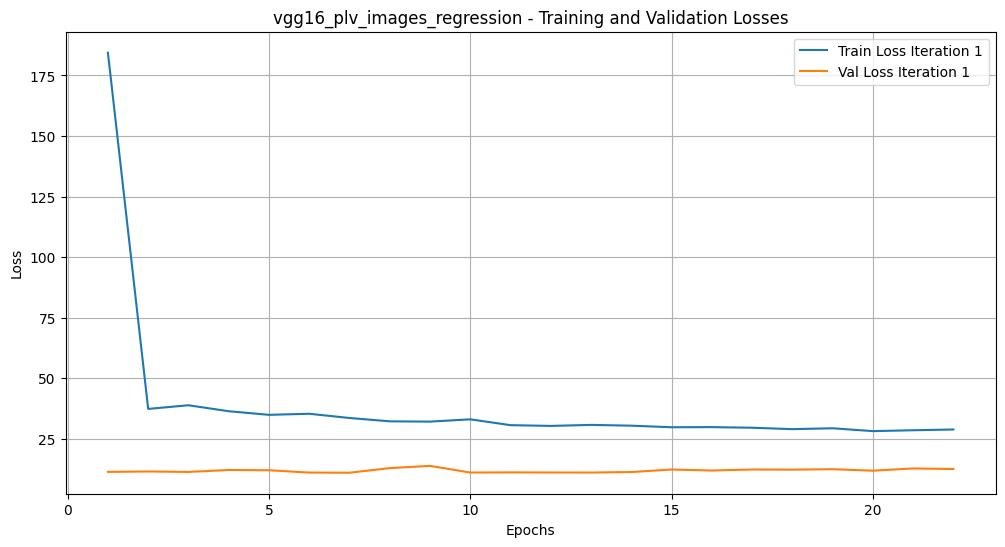

In [ ]:
# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(vgg16_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    vgg16_base_model.summary()

    # Define the model name
    model_name = 'vgg16_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# # Suppose you have confidence scores (e.g., model's certainty)
# # confidence_scores = get_confidence_scores(test_images)  # Define this function as needed

# aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
#     test_subjects, test_image_counts_per_subject, test_predictions
#     # , confidence_scores=confidence_scores  # Uncomment if using
# )


#### ResNet50

In [ ]:
# ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# ResNet50_base_model.summary()

In [ ]:
# model_name = 'ResNet50_plv_images'
# train_and_evaluate_model(ResNet50_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 376.2532 - mean_absolute_error: 16.9051 - mean_squared_error: 376.2532
Epoch 1: val_mean_squared_error improved from inf to 13.31720, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - loss: 375.4590 - mean_absolute_error: 16.8775 - mean_squared_error: 375.4590 - val_loss: 13.3172 - val_mean_absolute_error: 3.3902 - val_mean_squared_error: 13.3172 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 36.9303 - mean_absolute_error: 4.7310 - mean_squared_error: 36.9303
Epoch 2: val_mean_squared_error did not improve from 13.31720
481/481 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 36.9240 - mean_absolute_error: 4.7307 - mean_squared_error: 36.9240 - val_loss: 13.5553 - val_mean_absolute_error: 3.4299 - val_mean_squared_error: 13.5553 - learning_rate: 1.0000e-04
Epoch 3/100
479/481 ━━━━━━━━━

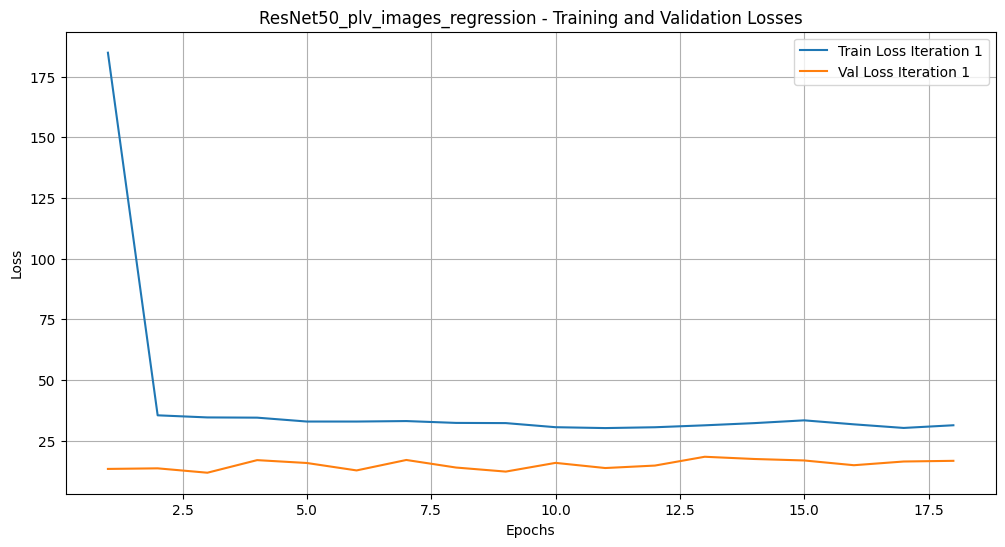

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(ResNet50_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet50_base_model.summary()

    # Define the model name
    model_name = 'ResNet50_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


#### Densenet121

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 372.0395 - mean_absolute_error: 16.9995 - mean_squared_error: 372.0395
Epoch 1: val_mean_squared_error improved from inf to 13.73337, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - loss: 371.2734 - mean_absolute_error: 16.9722 - mean_squared_error: 371.2734 - val_loss: 13.7334 - val_mean_absolute_error: 3.4550 - val_mean_squared_error: 13.7334 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 40.9696 - mean_absolute_error: 4.8769 - mean_squared_error: 40.9696
Epoch 2: val_mean_squared_error improved from 13.73337 to 12.70328, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 40.9568 - mean_absolute_error: 4.8763 - mean_squared_error: 40.9568 - val_loss: 12.7033 - val_mean_absolu

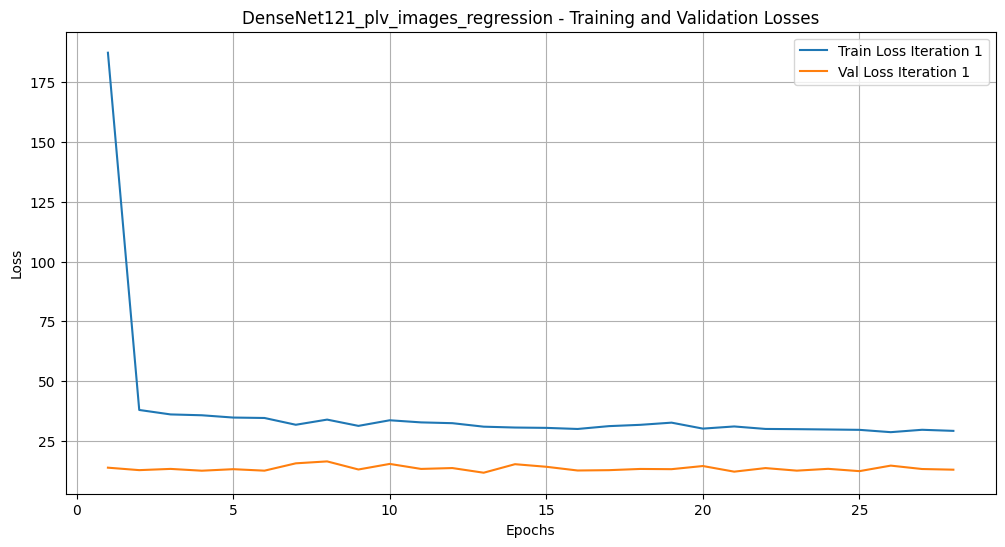

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    DenseNet121_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(DenseNet121_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    DenseNet121_base_model.summary()

    # Define the model name
    model_name = 'DenseNet121_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# Dense_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Dense_base_model.summary()

In [ ]:
# model_name = 'Densenet121_plv_images'
# train_and_evaluate_model(Dense_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### MobileNet V2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)


Iteration 1:
Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 393.4898 - mean_absolute_error: 17.4733 - mean_squared_error: 393.4898
Epoch 1: val_mean_squared_error improved from inf to 12.36262, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - loss: 393.0712 - mean_absolute_error: 17.4587 - mean_squared_error: 393.0712 - val_loss: 12.3626 - val_mean_absolute_error: 3.1054 - val_mean_squared_error: 12.3626 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 36.9291 - mean_absolute_error: 4.8095 - mean_squared_error: 36.9291
Epoch 2: val_mean_squared_error did not improve from 12.36262
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 36.9268 - mean_absolute_error: 4.8091 - mean_squared_error: 36.9268 - val_loss: 12.4562 - val_mean_absolute_error: 3.1491 - val_mean_squared_error: 12.4562 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━━━━

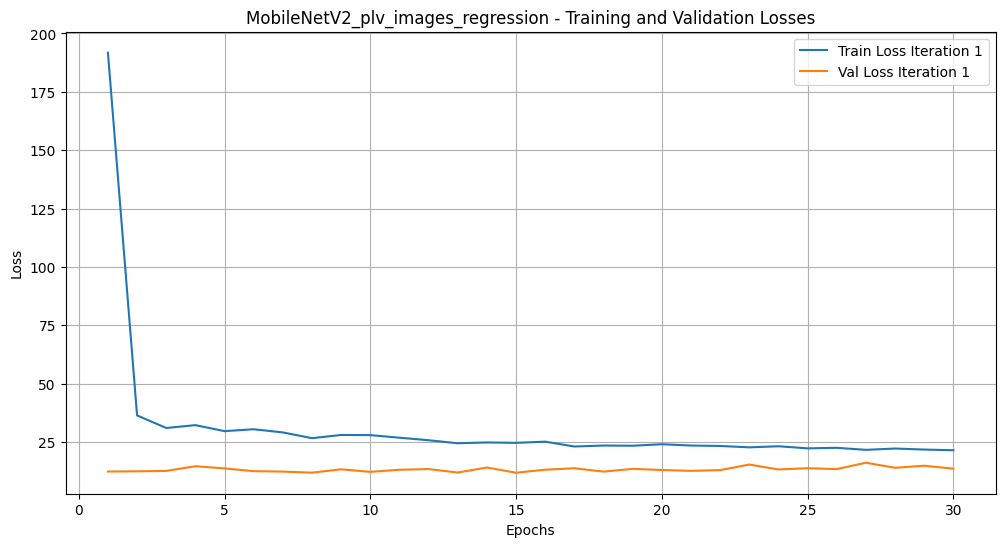

In [ ]:

from tensorflow.keras.applications import MobileNetV2

# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(MobileNetV2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    MobileNetV2_base_model.summary()

    # Define the model name
    model_name = 'MobileNetV2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import MobileNetV2

# MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# MobileNetV2_base_model.summary()

In [ ]:
# model_name = 'mobilenetv2_plv_images'
# train_and_evaluate_model(MobileNetV2_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### EfficientNet B2 & B0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 470.1346 - mean_absolute_error: 20.2730 - mean_squared_error: 470.1346
Epoch 1: val_mean_squared_error improved from inf to 12.76946, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 63s 73ms/step - loss: 469.3211 - mean_absolute_error: 20.2451 - mean_squared_error: 469.3211 - val_loss: 12.7695 - val_mean_absolute_error: 3.2819 - val_mean_squared_error: 12.7695 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 28.8973 - mean_absolute_error: 4.1002 - mean_squared_error: 28.8973
Epoch 2: val_mean_squared_error improved from 12.76946 to 12.48030, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - loss: 28.8960 - mean_absolute_error: 4.1000 - mean_squared_error: 28.8960 - val_loss: 12.4803 - val_mean_

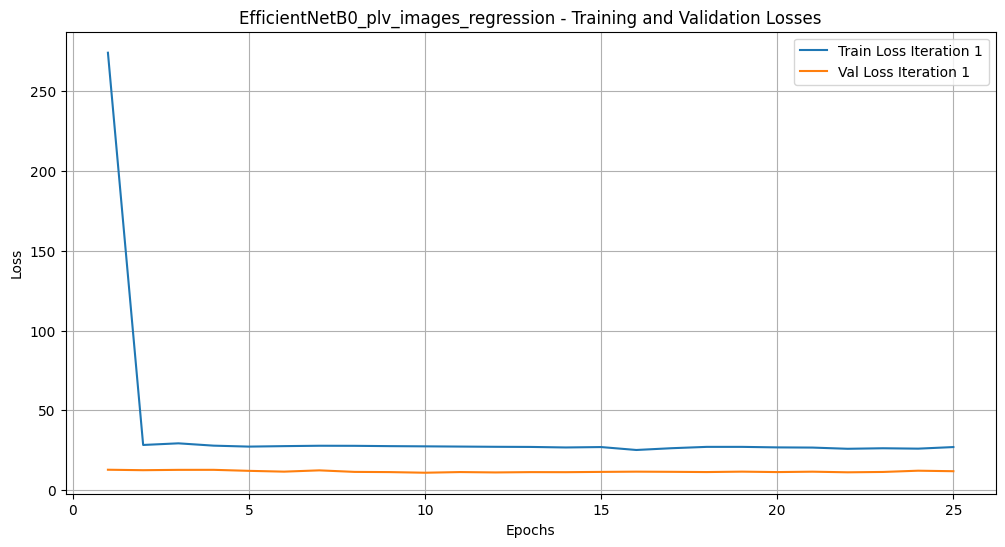

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB0_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB0_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB0_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB0_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,768,569 (29.63 MB)

 Trainable params: 7,700,994 (29.38 MB)

 Non-trainable params: 67,575 (263.97 KB)


Iteration 1:
Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 470.9557 - mean_absolute_error: 20.3030 - mean_squared_error: 470.9557
Epoch 1: val_mean_squared_error improved from inf to 12.03599, saving model to checkpoints/EfficientNetB2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - loss: 470.5533 - mean_absolute_error: 20.2894 - mean_squared_error: 470.5533 - val_loss: 12.0360 - val_mean_absolute_error: 3.1180 - val_mean_squared_error: 12.0360 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 30.5096 - mean_absolute_error: 4.1760 - mean_squared_error: 30.5096
Epoch 2: val_mean_squared_error did not improve from 12.03599
481/481 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - loss: 30.5005 - mean_absolute_error: 4.1755 - mean_squared_error: 30.5005 - val_loss: 12.1084 - val_mean_absolute_error: 3.1550 - val_mean_squared_error: 12.1084 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━

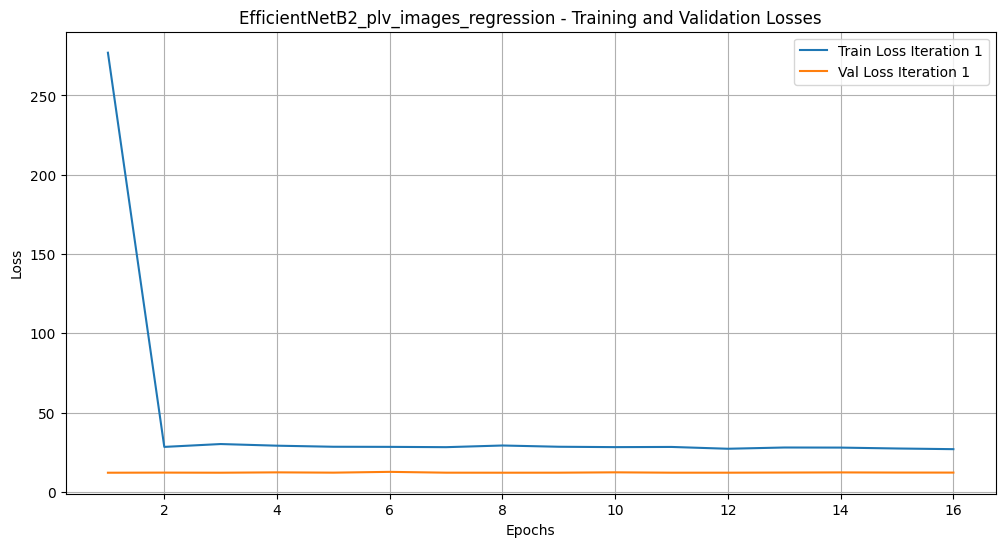

In [ ]:
from tensorflow.keras.applications import EfficientNetB2


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB2_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB2_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import EfficientNetB0

# # Load pre-trained EfficientNetB0 with weights from ImageNet, excluding the top (classification) layers.
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# base_model.summary()


In [ ]:
# model_name = 'efficientB0_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:
# from tensorflow.keras.applications import EfficientNetB2

# EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# EfficientNetB2_base_model.summary()

In [ ]:
# model_name = 'efficientB2_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### ResNet 18


In [ ]:
# ResNet18 Base Model (Custom)
def ResNet18(input_shape=(224, 224, 3)):
    inputs = tf.keras.layers.Input(shape=input_shape)
    # Custom ResNet18 layers would go here (for demonstration, we use ResNet50 base model)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

ResNet18_base_model = ResNet18()
train_and_evaluate_model(ResNet18_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet18_base_model = ResNet18()
    # model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet18_base_model.summary()

    # Define the model name
    model_name = 'ResNet18_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=ResNet18_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


## Train - Full Band

#### VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Iteration 1:
Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 383.5424 - mean_absolute_error: 17.2760 - mean_squared_error: 383.5424
Epoch 1: val_mean_squared_error improved from inf to 9.83741, saving model to checkpoints/vgg16_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - loss: 383.1430 - mean_absolute_error: 17.2621 - mean_squared_error: 383.1430 - val_loss: 9.8374 - val_mean_absolute_error: 2.7791 - val_mean_squared_error: 9.8374 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 33.6764 - mean_absolute_error: 4.4871 - mean_squared_error: 33.6764
Epoch 2: val_mean_squared_error did not improve from 9.83741
481/481 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - loss: 33.6874 - mean_absolute_error: 4.4880 - mean_squared_error: 33.6874 - val_loss: 10.2395 - val_mean_absolute_error: 2.8617 - val_mean_squared_error: 10.2395 - learning_rate: 1.0000e-04
Epoch 3/100
481/481 ━━━━━━━━━━━━━━━━

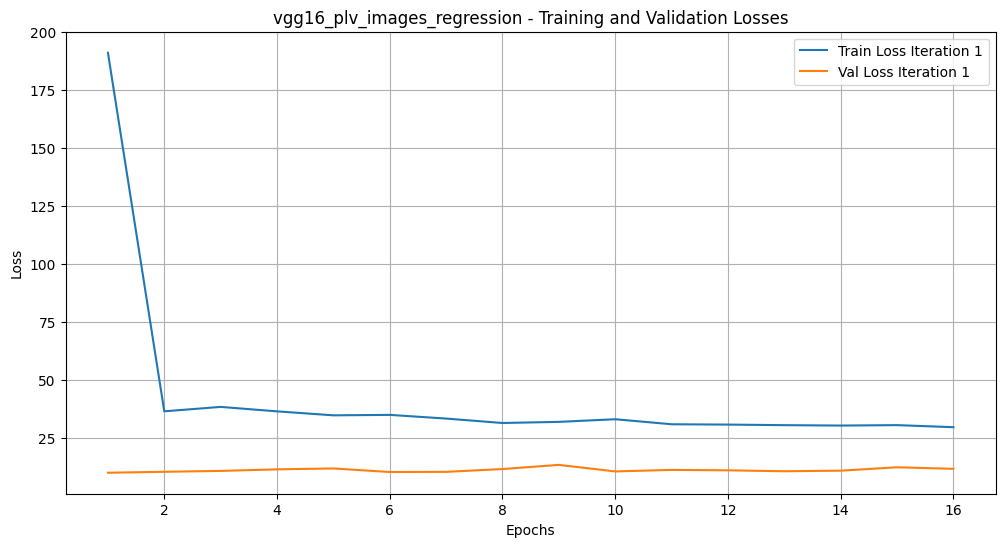

In [ ]:
# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(vgg16_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    vgg16_base_model.summary()

    # Define the model name
    model_name = 'vgg16_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# # Suppose you have confidence scores (e.g., model's certainty)
# # confidence_scores = get_confidence_scores(test_images)  # Define this function as needed

# aggregated_true, aggregated_preds = aggregate_subject_predictions_weighted(
#     test_subjects, test_image_counts_per_subject, test_predictions
#     # , confidence_scores=confidence_scores  # Uncomment if using
# )


#### ResNet50

In [ ]:
# ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# ResNet50_base_model.summary()

In [ ]:
# model_name = 'ResNet50_plv_images'
# train_and_evaluate_model(ResNet50_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


Iteration 1:
Epoch 1/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 376.3706 - mean_absolute_error: 16.9234 - mean_squared_error: 376.3706
Epoch 1: val_mean_squared_error improved from inf to 13.63125, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - loss: 375.1758 - mean_absolute_error: 16.8818 - mean_squared_error: 375.1758 - val_loss: 13.6312 - val_mean_absolute_error: 3.4518 - val_mean_squared_error: 13.6312 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 37.0461 - mean_absolute_error: 4.7173 - mean_squared_error: 37.0461
Epoch 2: val_mean_squared_error improved from 13.63125 to 12.50028, saving model to checkpoints/ResNet50_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 37.0391 - mean_absolute_error: 4.7169 - mean_squared_error: 37.0391 - val_loss: 12.5003 - val_mean_absolute_err

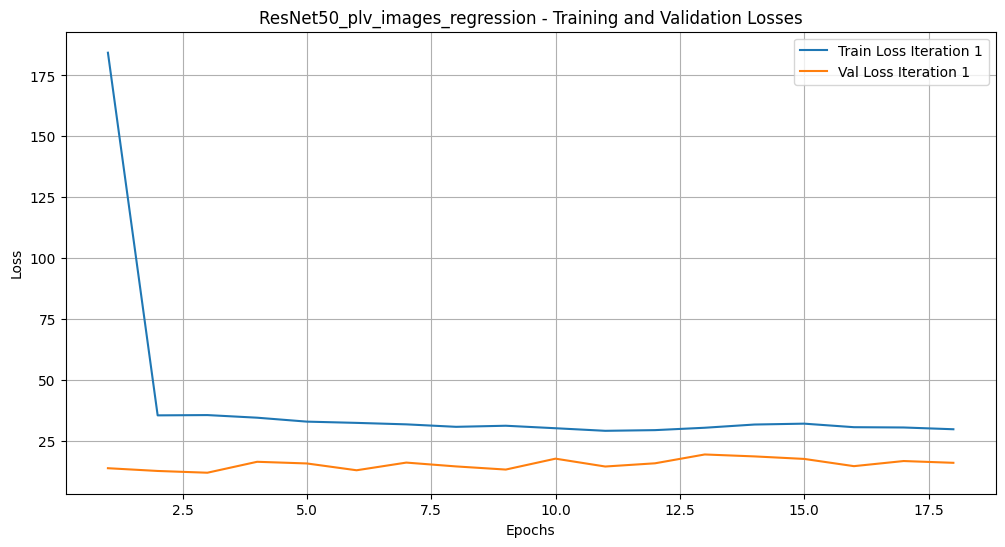

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(ResNet50_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet50_base_model.summary()

    # Define the model name
    model_name = 'ResNet50_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=vgg16_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


#### Densenet121

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 211.2859 - mean_absolute_error: 11.3845 - mean_squared_error: 211.2859
Epoch 1: val_mean_squared_error improved from inf to 19.06225, saving model to checkpoints/DenseNet121_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 111s 132ms/step - loss: 210.7875 - mean_absolute_error: 11.3661 - mean_squared_error: 210.7875 - val_loss: 19.0623 - val_mean_absolute_error: 4.0707 - val_mean_squared_error: 19.0623 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 38.5735 - mean_absolute_error: 4.6812 - mean_squared_error: 38.5735
Epoch 2: val_mean_squared_error did not improve from 19.06225
481/481 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - loss: 38.5744 - mean_absolute_error: 4.6813 - mean_squared_error: 38.5744 - val_loss: 23.8466 - val_mean_absolute_error: 4.3764 - val_mean_squared_error: 23.8466 - learning_rate: 1.0000e-04
Epoch 3/100
481/481 ━━━━

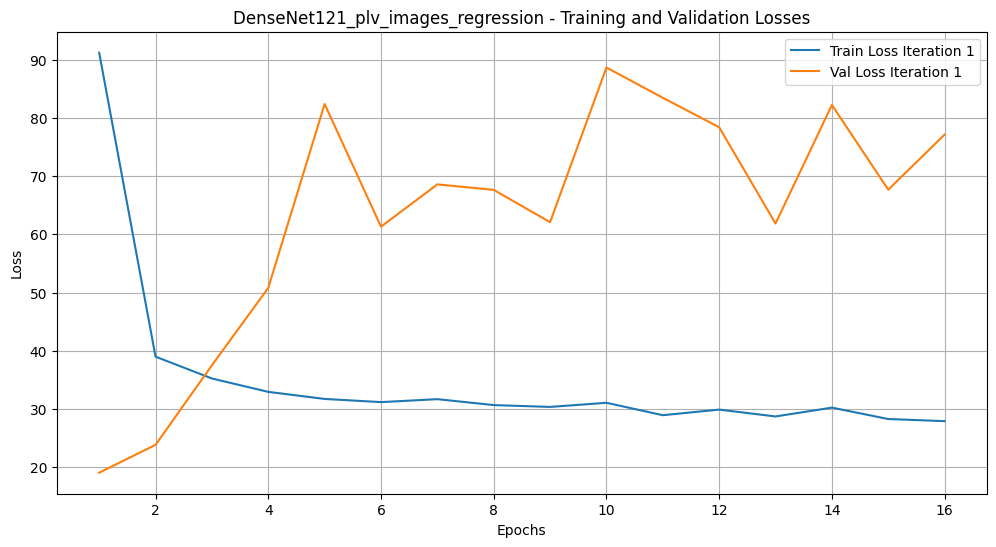

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    DenseNet121_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(DenseNet121_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    DenseNet121_base_model.summary()

    # Define the model name
    model_name = 'DenseNet121_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=DenseNet121_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# Dense_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Dense_base_model.summary()

In [ ]:
# model_name = 'Densenet121_plv_images'
# train_and_evaluate_model(Dense_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### MobileNet V2

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 495.2352 - mean_absolute_error: 20.9677 - mean_squared_error: 495.2352
Epoch 1: val_mean_squared_error improved from inf to 13.35502, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - loss: 494.4459 - mean_absolute_error: 20.9419 - mean_squared_error: 494.4459 - val_loss: 13.3550 - val_mean_absolute_error: 3.3116 - val_mean_squared_error: 13.3550 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 32.4469 - mean_absolute_error: 4.3820 - mean_squared_error: 32.4469
Epoch 2: val_mean_squared_error improved from 13.35502 to 12.71946, saving model to checkpoints/MobileNetV2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - loss: 32.4432 - mean_absolute_error: 4.3817 - mean_squared_error: 32.4432 - val_loss: 12.7195 - val_mean_absolu

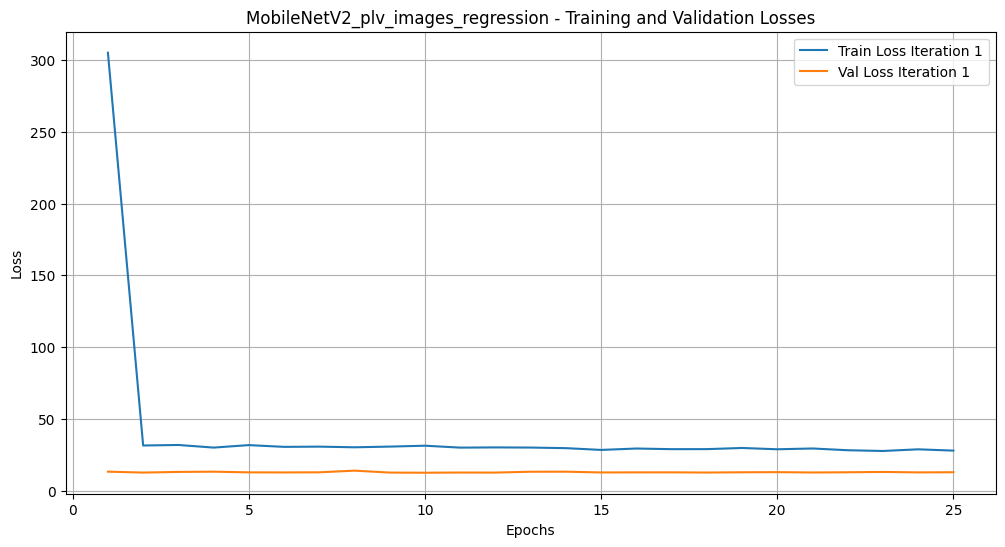

In [ ]:

from tensorflow.keras.applications import MobileNetV2

# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(MobileNetV2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    MobileNetV2_base_model.summary()

    # Define the model name
    model_name = 'MobileNetV2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=MobileNetV2_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import MobileNetV2

# MobileNetV2_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# MobileNetV2_base_model.summary()

In [ ]:
# model_name = 'mobilenetv2_plv_images'
# train_and_evaluate_model(MobileNetV2_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### EfficientNet B2 & B0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)


Iteration 1:
Epoch 1/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 445.0430 - mean_absolute_error: 19.4604 - mean_squared_error: 445.0430
Epoch 1: val_mean_squared_error improved from inf to 12.00150, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - loss: 444.2602 - mean_absolute_error: 19.4332 - mean_squared_error: 444.2602 - val_loss: 12.0015 - val_mean_absolute_error: 3.0950 - val_mean_squared_error: 12.0015 - learning_rate: 1.0000e-04
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 35.5861 - mean_absolute_error: 4.5020 - mean_squared_error: 35.5861
Epoch 2: val_mean_squared_error improved from 12.00150 to 11.62000, saving model to checkpoints/EfficientNetB0_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 35.5790 - mean_absolute_error: 4.5016 - mean_squared_error: 35.5790 - val_loss: 11.6200 - val_mean_

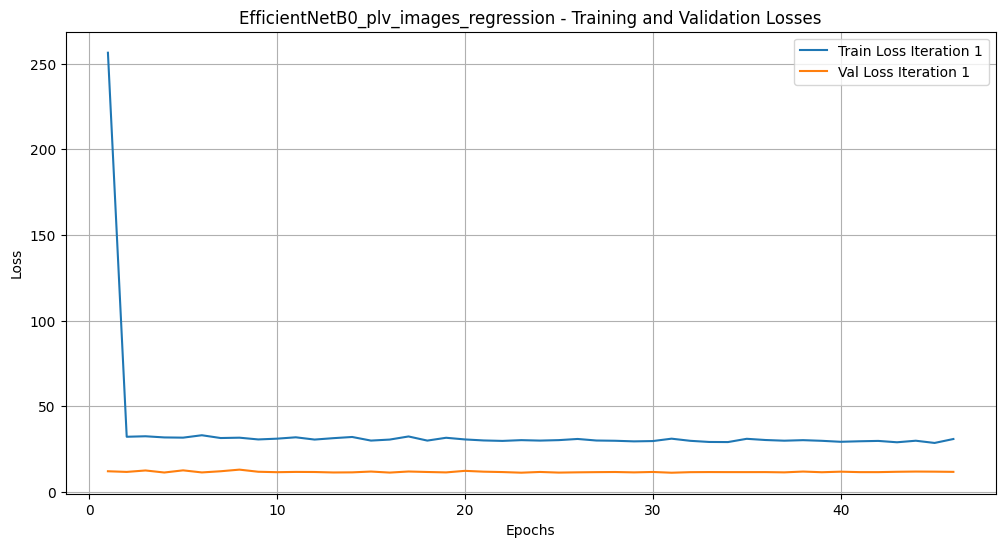

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB0_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB0_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB0_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB0_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,768,569 (29.63 MB)

 Trainable params: 7,700,994 (29.38 MB)

 Non-trainable params: 67,575 (263.97 KB)


Iteration 1:
Epoch 1/100
479/481 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 475.8991 - mean_absolute_error: 20.3652 - mean_squared_error: 475.8991
Epoch 1: val_mean_squared_error improved from inf to 12.60972, saving model to checkpoints/EfficientNetB2_plv_images_regression_best1_weights_iteration_1.weights.h5
481/481 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - loss: 474.6136 - mean_absolute_error: 20.3214 - mean_squared_error: 474.6136 - val_loss: 12.6097 - val_mean_absolute_error: 3.2778 - val_mean_squared_error: 12.6097 - learning_rate: 1.0000e-04
Epoch 2/100
480/481 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 26.3087 - mean_absolute_error: 3.9040 - mean_squared_error: 26.3087
Epoch 2: val_mean_squared_error did not improve from 12.60972
481/481 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 26.3055 - mean_absolute_error: 3.9038 - mean_squared_error: 26.3055 - val_loss: 12.6803 - val_mean_absolute_error: 3.2887 - val_mean_squared_error: 12.6803 - learning_rate: 1.0000e-04
Epoch 3/100
480/481 ━━━

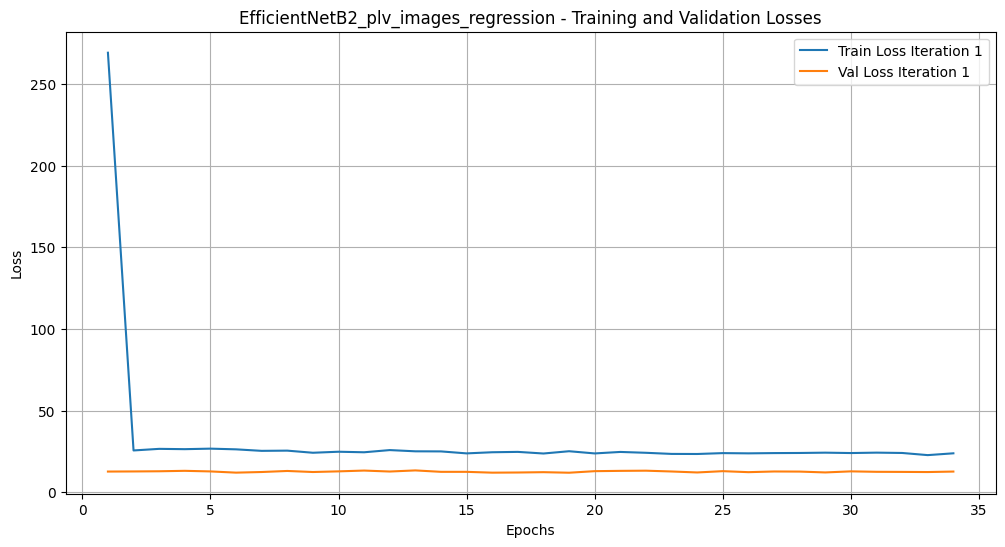

In [ ]:
from tensorflow.keras.applications import EfficientNetB2


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    EfficientNetB2_base_model.summary()

    # Define the model name
    model_name = 'EfficientNetB2_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=EfficientNetB2_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )


In [ ]:
# from tensorflow.keras.applications import EfficientNetB0

# # Load pre-trained EfficientNetB0 with weights from ImageNet, excluding the top (classification) layers.
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# base_model.summary()


In [ ]:
# model_name = 'efficientB0_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:
# from tensorflow.keras.applications import EfficientNetB2

# EfficientNetB2_base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# EfficientNetB2_base_model.summary()

In [ ]:
# model_name = 'efficientB2_plv_images'
# train_and_evaluate_model(base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

#### ResNet 18


In [ ]:
# ResNet18 Base Model (Custom)
def ResNet18(input_shape=(224, 224, 3)):
    inputs = tf.keras.layers.Input(shape=input_shape)
    # Custom ResNet18 layers would go here (for demonstration, we use ResNet50 base model)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

ResNet18_base_model = ResNet18()
train_and_evaluate_model(ResNet18_base_model, subject_folders, labels, num_epochs=100, num_iterations=1, model_name=model_name)

In [ ]:


# Now you can create and compile your model inside the strategy scope
with strategy.scope():
    # Initialize the base model
    ResNet18_base_model = ResNet18()
    # model = create_new_model(EfficientNetB2_base_model, fine_tune_at=15)  # # Fine-tune the top 4 layers of VGG16


    ResNet18_base_model.summary()

    # Define the model name
    model_name = 'ResNet18_plv_images_regression'

    # Train and evaluate the model
    train_and_evaluate_model(
        base_model=ResNet18_base_model,
        subject_folders=subject_folders,
        mmse_scores=mmse_scores,
        num_epochs=100,
        num_iterations=1,
        model_name=model_name
    )
